Accuracy: 0.7744
Mean Squared Error (MSE): 0.2256
Mean Absolute Error (MAE): 0.2256

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.87      0.75        53
           1       0.89      0.71      0.79        80

    accuracy                           0.77       133
   macro avg       0.78      0.79      0.77       133
weighted avg       0.80      0.77      0.78       133



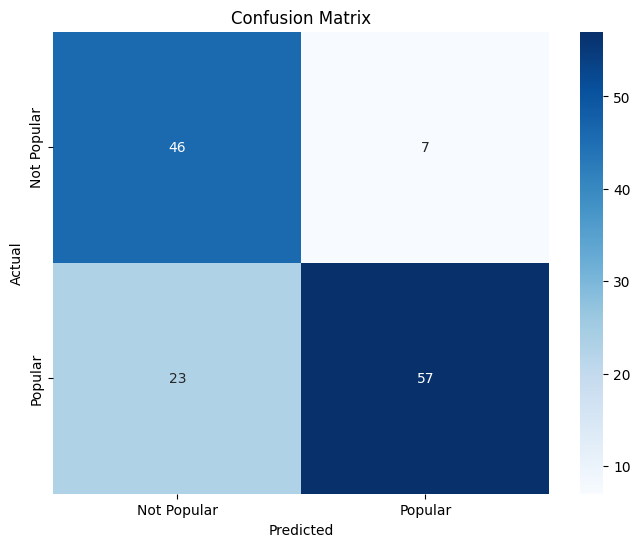

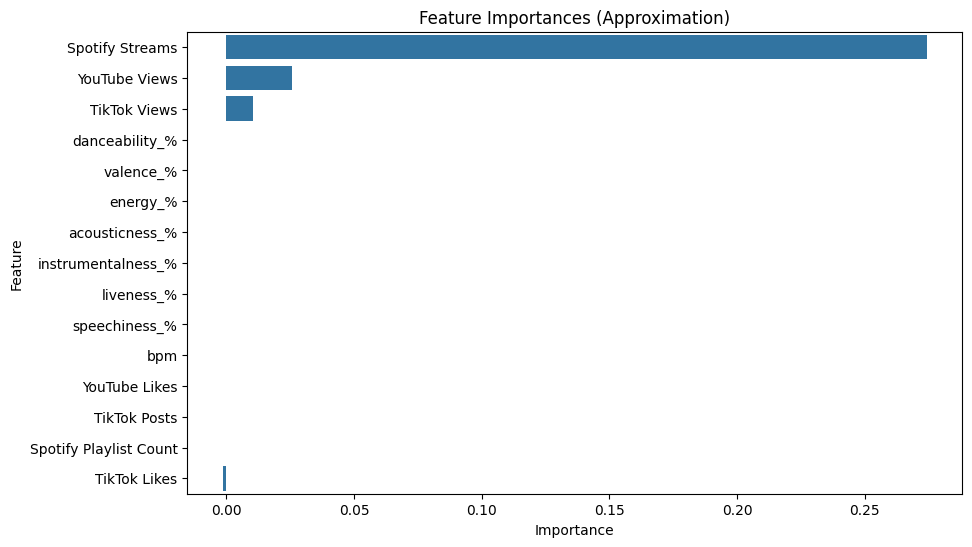

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("final_data.csv")

# Replace commas and convert to numeric
columns_to_clean = [
    "YouTube Likes", "YouTube Views", "TikTok Likes", 
    "TikTok Posts", "TikTok Views", "Spotify Streams", "Spotify Playlist Count"
]

for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].replace(",", "", regex=True).astype(float)

# Define the threshold for popularity
POPULARITY_THRESHOLD = 70
df["is_popular"] = (df["Spotify Popularity"] >= POPULARITY_THRESHOLD).astype(int)

# Select features for the model
audio_features = [
    "danceability_%", "valence_%", "energy_%", "acousticness_%",
    "instrumentalness_%", "liveness_%", "speechiness_%", "bpm"
]

social_media_features = [
    "YouTube Likes", "YouTube Views", "TikTok Likes", "TikTok Posts",
    "TikTok Views", "Spotify Streams", "Spotify Playlist Count"
]

# Combine all selected features
features = audio_features + social_media_features
target = "is_popular"

# Drop rows with missing values in the selected features
df_model = df[features + [target]].dropna()

# Split the dataset into training and testing sets
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Support Vector Machine (SVM)
model = SVC(kernel="rbf", probability=True, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}\n")
print("Classification Report:")
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Popular", "Popular"], yticklabels=["Not Popular", "Popular"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature importance approximation using permutation importance (if required)
# Note: SVM does not provide feature importances directly.
try:
    from sklearn.inspection import permutation_importance
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    
    features_df = pd.DataFrame({
        "Feature": features,
        "Importance": perm_importance.importances_mean
    })
    features_df = features_df.sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=features_df)
    plt.title("Feature Importances (Approximation)")
    plt.show()
except ImportError:
    print("Permutation importance could not be computed. Please install the required libraries.")
